### Tarea 8.9
Suponga que la medición de un cierto proceso físico da como resultado la siguiente expresión

$$
p(x) = \sin x + n(x)
$$

donde $n$ es el error experimental que podemos describir como un número aleatorio, para cada valor de $x$, tomado de una distribución gaussiana con media $0$ y desviación estándar $10^{-5}$. Queremos calcular la integral

$$
\int_0^1 dx\,p(x)\,.
$$

Use el método compuesto de Simpson para calcular esta integral. El verdadero valor de esta integral es $1-\cos(1)$. Grafique el error cometido en función de $h$. ¿Se puede lograr una precisión de $10^{-7}$? ¿Por qué?

In [3]:
import numpy as np

def p(x):
    return np.sin(x)

# Número de subintervalos iniciales
N = 10

# Valor verdadero de la integral
valor_real = 1 - np.cos(1)

# Precisión deseada
precision_deseada = 1e-7

error = np.inf

while error > precision_deseada:
    h = 1 / N
    x_values = np.linspace(0, 1, N + 1)
    integral = 0

    for i in range(N):
        integral += h / 6 * (p(x_values[i]) + 4 * p(x_values[i] + h / 2) + p(x_values[i + 1]))

    error = abs(integral - valor_real)
    N *= 2

print(f"Resultado con h = {h}: {integral}")
print(f"Error cometido: {error}")


Resultado con h = 0.1: 0.4596977100983376
Error cometido: 1.5966477362461262e-08


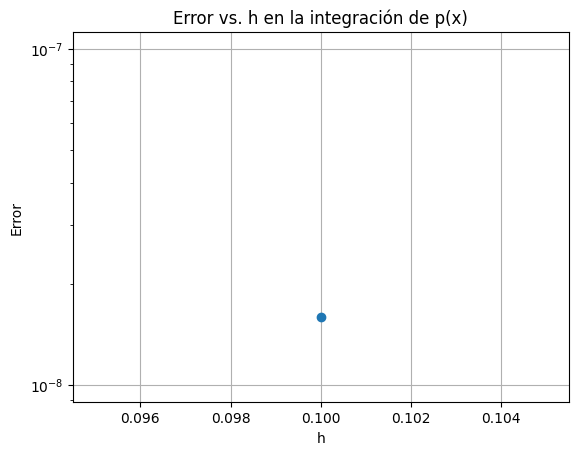

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def p(x):
    return np.sin(x)

# Número de subintervalos iniciales
N = 10

# Valor verdadero de la integral
valor_real = 1 - np.cos(1)

# Precisión deseada
precision_deseada = 1e-7

h_valores = []
error_valores = []

error = np.inf

while error > precision_deseada:
    h = 1 / N
    x_values = np.linspace(0, 1, N + 1)
    integral = 0

    for i in range(N):
        integral += h / 6 * (p(x_values[i]) + 4 * p(x_values[i] + h / 2) + p(x_values[i + 1]))

    error = abs(integral - valor_real)
    h_valores.append(h)
    error_valores.append(error)
    N *= 2

plt.plot(h_valores, error_valores, marker='o', linestyle='-')
plt.xlabel('h')
plt.ylabel('Error')
plt.yscale('log')  # Escala logarítmica en el eje vertical para mejor visualización
plt.title('Error vs. h en la integración de p(x)')
plt.grid(True)
plt.show()
